In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

11493376/11490434 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


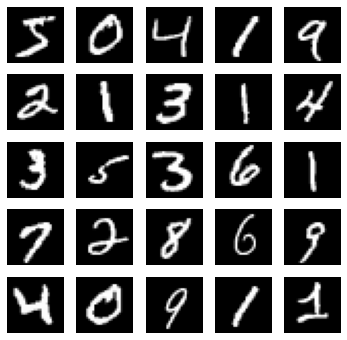

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

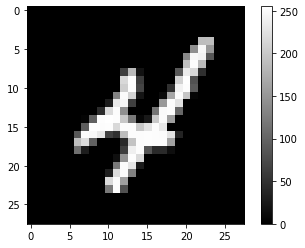

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

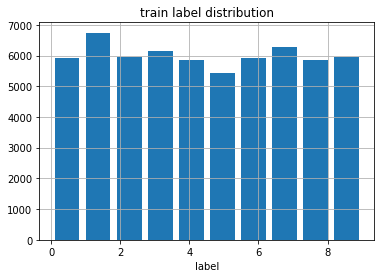

In [4]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [5]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8598 - val_loss: 0.1981 - val_accuracy: 0.9424
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1604 - accuracy: 0.9545 - val_loss: 0.1438 - val_accuracy: 0.9583
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1096 - accuracy: 0.9685 - val_loss: 0.1218 - val_accuracy: 0.9628
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0780 - accuracy: 0.9775 - val_loss: 0.1132 - val_accuracy: 0.9659
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.1053 - val_accuracy: 0.9693
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.1058 - val_accuracy: 0.9687
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.1055 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1344 - accuracy: 0.9750


[0.1344016194343567, 0.9750000238418579]

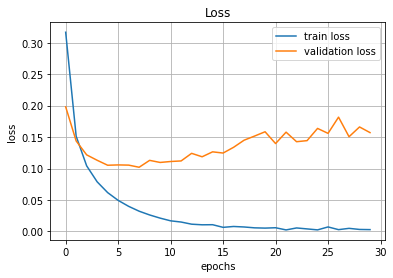

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

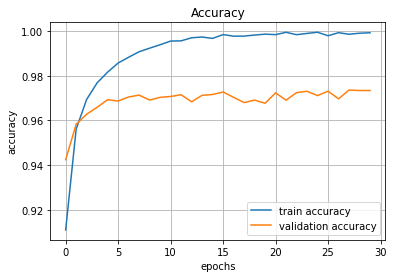

In [12]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

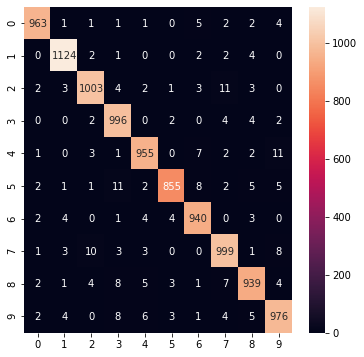

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [25]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[ 963    1    1    1    1    0    5    2    2    4]
 [   0 1124    2    1    0    0    2    2    4    0]
 [   2    3 1003    4    2    1    3   11    3    0]
 [   0    0    2  996    0    2    0    4    4    2]
 [   1    0    3    1  955    0    7    2    2   11]
 [   2    1    1   11    2  855    8    2    5    5]
 [   2    4    0    1    4    4  940    0    3    0]
 [   1    3   10    3    3    0    0  999    1    8]
 [   2    1    4    8    5    3    1    7  939    4]
 [   2    4    0    8    6    3    1    4    5  976]]


label = 0	(963/980)	accuracy = 0.983
label = 1	(1124/1135)	accuracy = 0.990
label = 2	(1003/1032)	accuracy = 0.972
label = 3	(996/1010)	accuracy = 0.986
label = 4	(955/982)	accuracy = 0.973
label = 5	(855/892)	accuracy = 0.959
label = 6	(940/958)	accuracy = 0.981
label = 7	(999/1028)	accuracy = 0.972
label = 8	(939/974)	accuracy = 0.964
label = 9	(976/1009)	accuracy = 0.967


In [16]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 975. 1141. 1026. 1034.  978.  868.  967. 1033.  968. 1010.]
